In [1]:
import numpy as np
import pandas
import scanpy
import scanpy as sc
import anndata
import matplotlib.pyplot as plt
import scanpy.plotting as scp
import seaborn as sns
from collections import defaultdict
import collections
import math
%matplotlib inline

import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

/home/ubuntu/.local/lib/python3.6/site-packages/numba/errors.py:105: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


scanpy==1.4 anndata==0.6.19 numpy==1.17.0 scipy==1.2.1 pandas==0.25.0 scikit-learn==0.20.3 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
df = anndata.read("./write/tgfb1-5-treated.h5ad")

In [3]:
df

AnnData object with n_obs × n_vars = 7441 × 4542 
    obs: 'batch', 'cellular_barcode', 'n_counts', 'percent_mito', 'S_score', 'G2M_score', 'phase', 'louvain', 'ALK5 signature', 'ALK1 signature', 'cVSMC signature', 'fibroblast signature'
    var: 'gene_names', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'velocity_gamma', 'velocity_r2', 'velocity_genes'
    uns: 'genes_before_highly_variable', 'genes_original', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'phase_colors', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'ambiguous', 'spliced', 'unspliced', 'variance_velocity', 'velocity'

In [4]:
sc.set_figure_params(scanpy=True, dpi=600, dpi_save=600, frameon=True, vector_friendly=True, fontsize=10, color_map=None, format='pdf', transparent=False, ipython_format='png2x')

In [5]:
#sc.pl.heatmap(df, ['SERPINE1', 'CTGF', 'FGF2', 'ACTA2', 'TRIB3', 'PLAUR', 'ID3', 'SCARA3', 'ID1','HMGA1'], groupby='louvain')

In [6]:
clusters = df.obs["louvain"].to_list()

In [46]:
genes = ['SERPINE1', 'FGF2', 'CTGF', 'CALD1', 'IGFBP3', 'DDAH1',
                  'CCDC80', 'TPM1', 'CYR61','DLC1', 'NEK7', 'PTX3', 'EXT1',
                 'PXDC1', 'CRIM1', 'DMD', 'SYNE1', 'PRKG1', 'CTPS1',
         
]

# Genes highly expressed from each cluster -- from Gene Ontology
# SERPINE1 is skipped as it is also a gene we are investigating regardless.
# CCDC181 was removed because it was so highly expressed that it made the scale
# obsolete
genes += ["WWTR1", "VIM", "HNRNPH1", "TNFRSF11B", "SAT1", "ARHGAP29", "TP63"]

    
louvain_counts = collections.Counter(df.obs["louvain"])
counts = df[:, genes].X
cumulative = np.zeros(shape=(len(louvain_counts), len(genes)))
for cluster, count in zip(df.obs["louvain"], counts):
    cumulative[int(cluster)] += count

for cluster, counts in louvain_counts.items():
    cumulative[int(cluster)] /= counts

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11')]

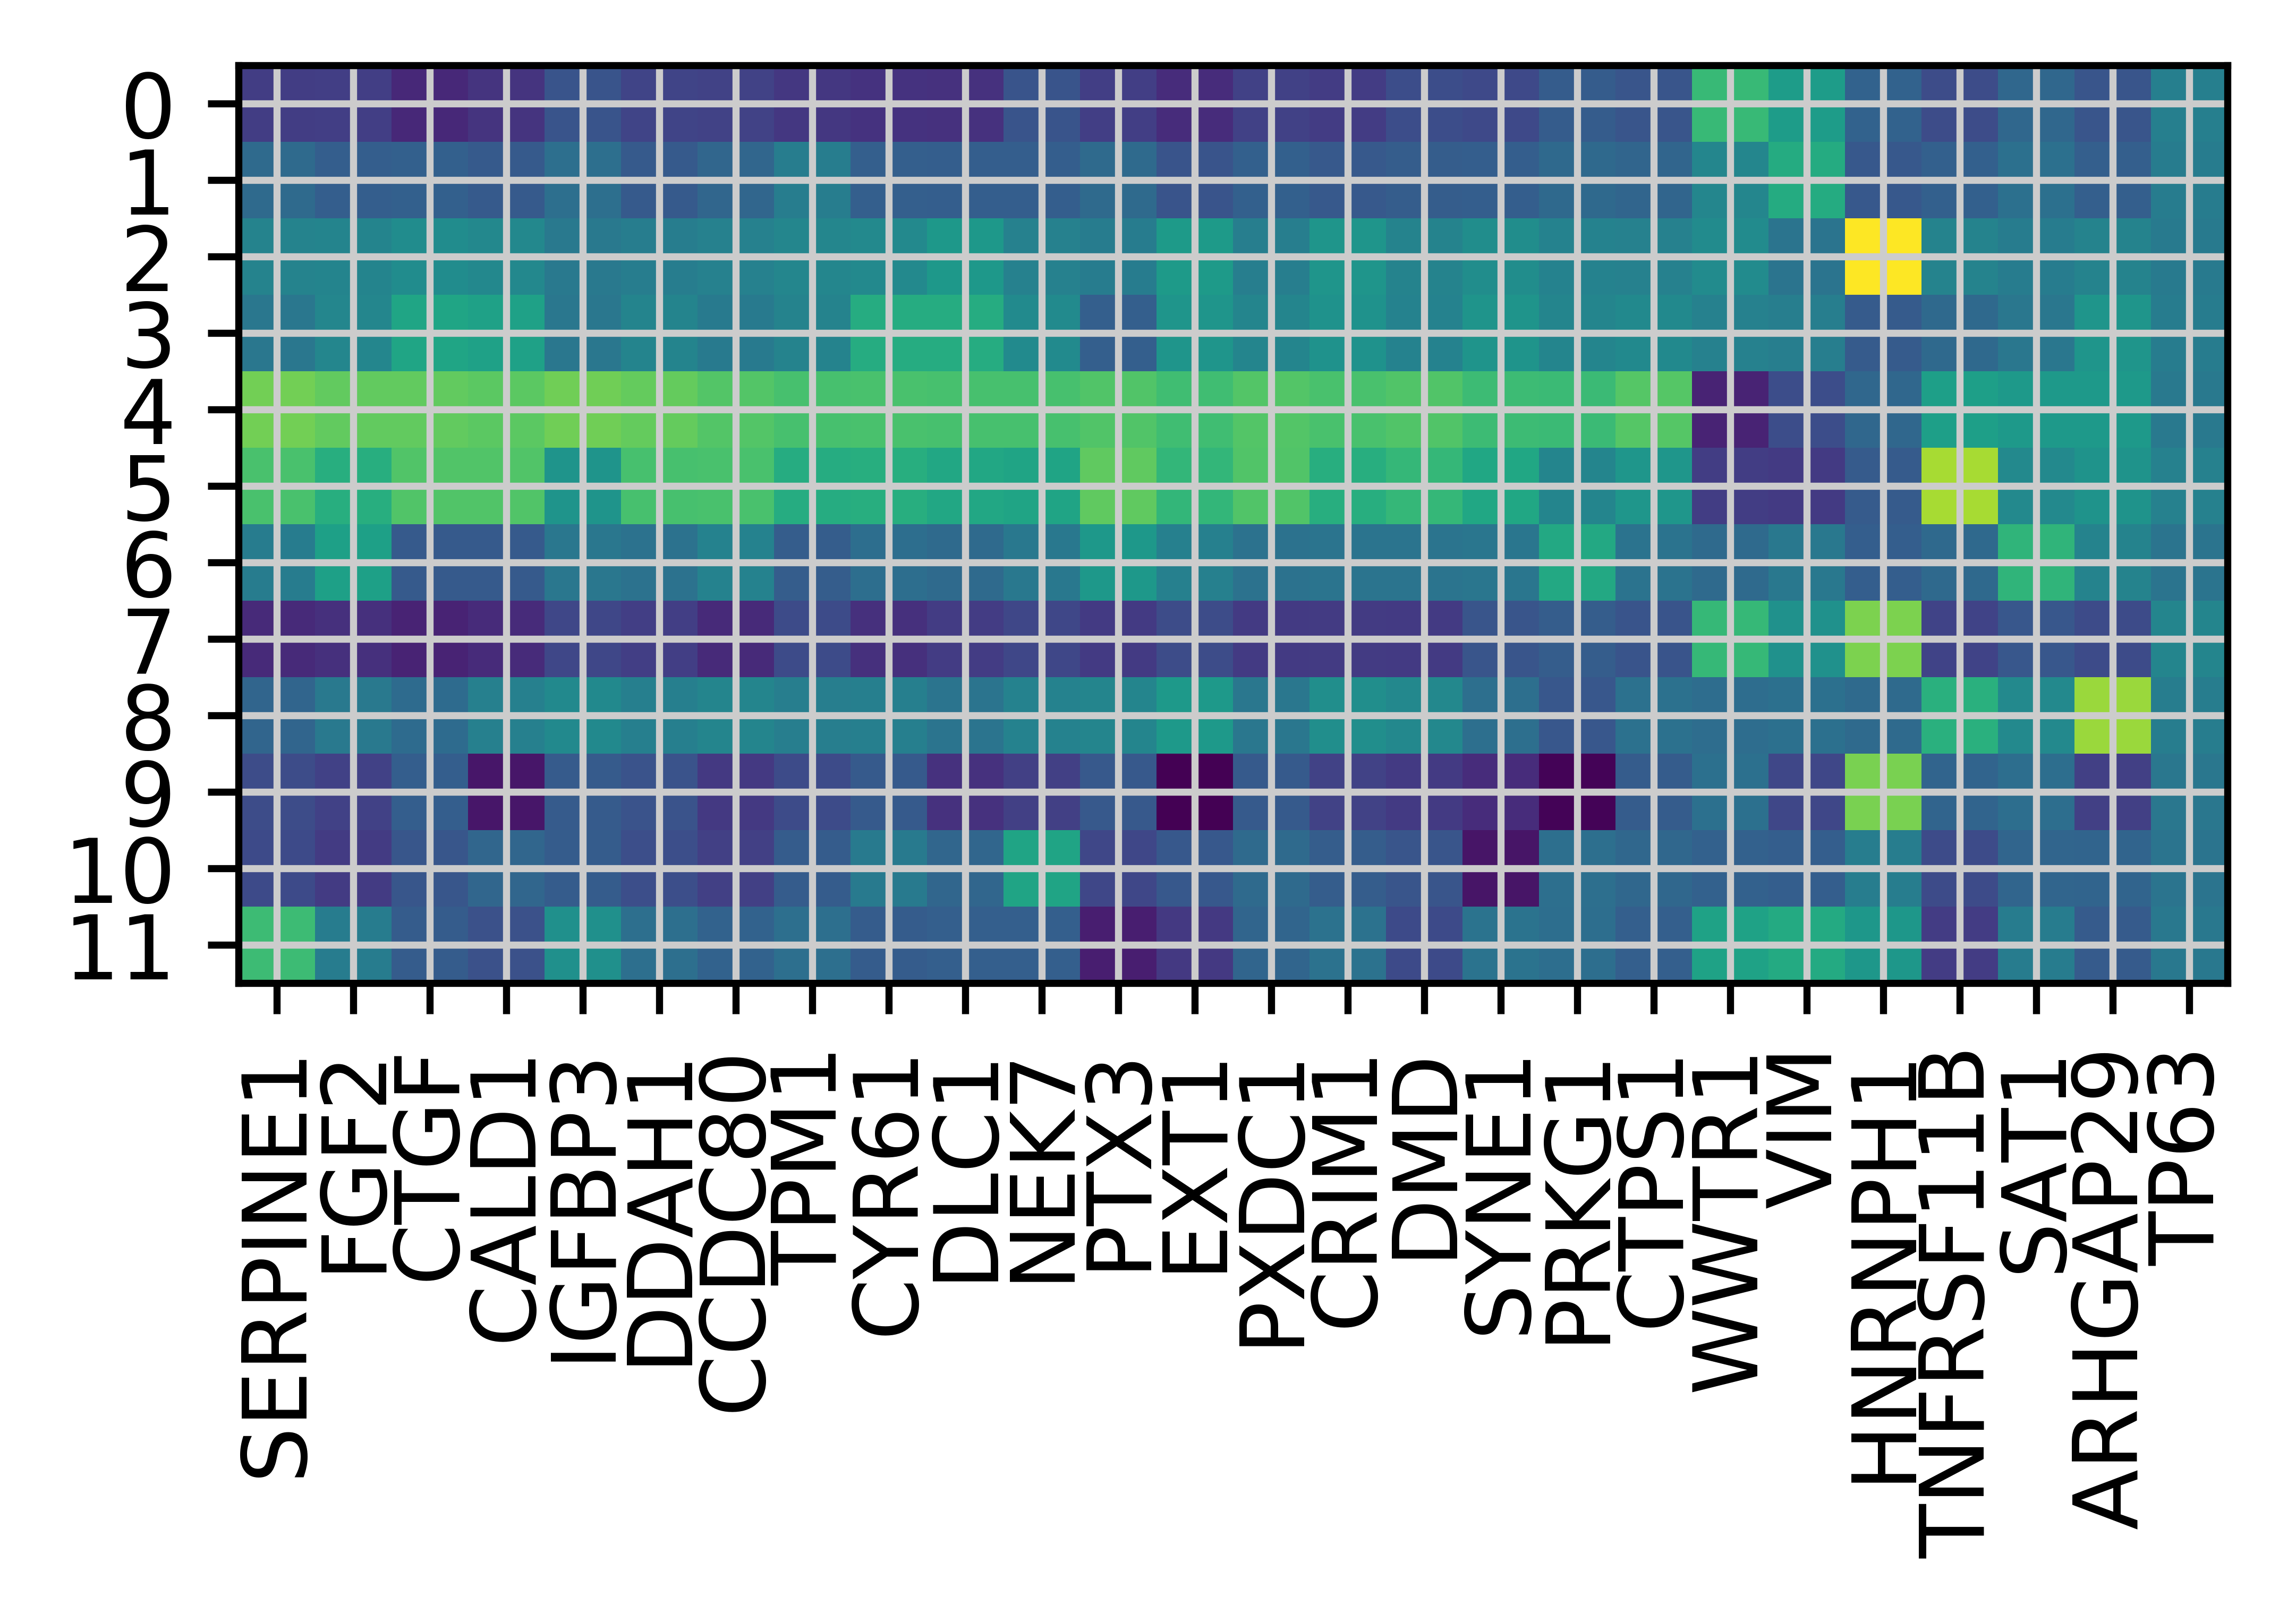

In [48]:
fig, ax = plt.subplots()
im = ax.imshow(cumulative)
louvain = range(len(louvain_counts))
# We want to show all ticks...
ax.set_xticks(np.arange(len(genes)))
plt.xticks(rotation="vertical")
ax.set_yticks(np.arange(len(louvain)))
# ... and label them with the respective list entries
ax.set_xticklabels(genes)
ax.set_yticklabels(louvain)